In [ ]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_summed_parquet(source_parquet, target_parquet="steam_reviews_summed.parquet"):

    
    df = pd.read_parquet(source_parquet)
    df['votes_up'] = df['votes_up'].fillna(0)
    df['votes_funny'] = df['votes_funny'].fillna(0)
    df['total_useful'] = df['votes_up'] + df['votes_funny']
    
    # Write out new parquet
    df.to_parquet(target_parquet, index=False)
    print(f"Created {target_parquet} with 'total_useful' column.")

In [ ]:


con = duckdb.connect()
ORIGINAL_PARQUET = "noNull.parquet"  
parq   = "steam_reviews_summed.parquet"

create_summed_parquet(ORIGINAL_PARQUET, parq)


Created steam_reviews_summed.parquet with 'total_useful' column.


In [30]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
con = duckdb.connect()
parq = "rev.parquet"

In [35]:

full = con.execute(f"SELECT * FROM {parq} ORDER BY total_useful DESC LIMIT 10").fetch_df()
full

,recommendationid,game,author_steamid,author_playtime_at_review,author_last_played,language,timestamp_created,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,total_useful
0,28126840,Xenus 2. White gold.,76561198069621476,19,1623173410,russian,2016-12-01 20:46:54,87,4294967295,0.594245,13,0,0,0,4294967382
1,30567480,Total War: WARHAMMER,76561198008235152,1215,1514554105,french,2017-03-17 11:57:39,76,4294967295,0.728008,0,0,0,0,4294967371
2,9931212,Half-Life: Source,76561197987262597,8,86400,russian,2014-04-25 18:01:16,70,4294967295,0.792095,3,0,0,0,4294967365
3,32220470,Tempest,76561197967047266,1788,1496937133,english,2017-06-06 14:01:47,61,4294967295,0.822483,0,1,0,0,4294967356
4,31605928,Factorio,76561198045311015,11311,1652455671,english,2017-05-07 14:52:49,55,4294967295,0.796059,5,0,0,1,4294967350
5,31535661,Rise of the Tomb Raider,76561198034193738,3728,1511470779,english,2017-05-04 04:39:52,54,4294967294,0.817121,10,1,0,0,4294967348
6,21723426,Stardew Valley,76561198040480911,3979,1539476144,german,2016-03-09 07:03:39,52,4294967295,0.776365,7,1,0,0,4294967347
7,23238679,Spec Ops: The Line,76561198059517386,775,1466273962,russian,2016-05-27 18:26:18,51,4294967295,0.755277,0,1,0,0,4294967346
8,1774354,SpaceChem,76561197997792412,883,1527269235,english,2013-08-01 23:30:36,50,4294967294,0.792859,0,0,0,0,4294967344
9,12833561,Miscreated,76561198067800945,208,1525577362,german,2014-11-07 20:29:55,49,4294967295,0.603827,9,0,0,1,4294967344


In [ ]:


def get_purchase_counts():
    query = f"""
        SELECT
            steam_purchase,
            COUNT(*) AS review_count
        FROM '{parq}'
        GROUP BY steam_purchase
        ORDER BY steam_purchase
    """
    return con.execute(query).fetchdf()

def plot_purchase_counts(df):
    plt.figure(figsize=(5,4))
    sns.barplot(data=df, x='steam_purchase', y='review_count', palette='Blues')
    plt.title("Count of Reviews by Purchase Status")
    plt.xlabel("steam_purchase (1=purchased, 0=not purchased)")
    plt.ylabel("Number of Reviews")
    plt.tight_layout()
    plt.show()

df_purchase_counts = get_purchase_counts()
df_purchase_counts



,steam_purchase,review_count
0,0,37719573
1,1,73658878


/var/folders/nb/9vq11ylj5l5715vrvc8fj0b00000gn/T/ipykernel_32148/131661709.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='steam_purchase', y='review_count', palette='Blues')


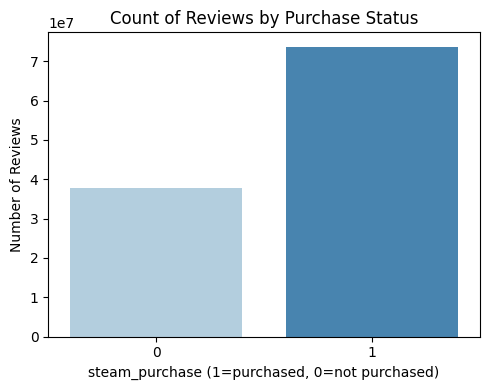

In [17]:
plot_purchase_counts(df_purchase_counts)

In [ ]:


def get_paid_vs_free():
    query = f"""
        SELECT
            received_for_free,
            AVG(total_useful) AS avg_useful,
            COUNT(*) AS count_reviews
        FROM '{parq}'
        GROUP BY received_for_free
        ORDER BY received_for_free
    """
    return con.execute(query).fetchdf()

def plot_paid_vs_free(df):
    
    plt.figure(figsize=(5,4))
    sns.barplot(data=df, x='received_for_free', y='avg_useful', palette='Greens')
    plt.title("Avg 'Useful' Votes: Paid vs. Free")
    plt.xlabel("received_for_free (0=paid, 1=free)")
    plt.ylabel("Average total_useful")
    plt.tight_layout()
    plt.show()



df_paid_free = get_paid_vs_free()
df_paid_free



,received_for_free,avg_useful,count_reviews
0,0,70890.416263,106817695
1,1,78165.485566,4560756


/var/folders/nb/9vq11ylj5l5715vrvc8fj0b00000gn/T/ipykernel_32148/574435401.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='received_for_free', y='avg_useful', palette='Greens')


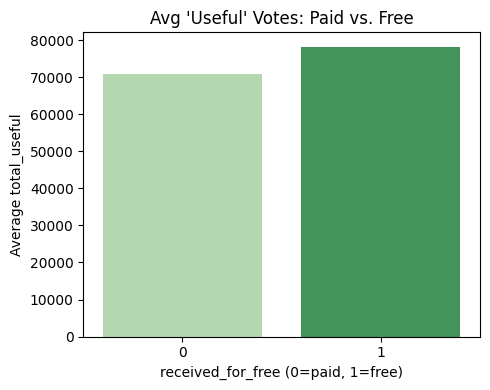

In [19]:
plot_paid_vs_free(df_paid_free)

   steam_purchase    avg_useful  count_reviews
0               0  75601.165695       34485522
1               1  68644.491020       72332173


/var/folders/nb/9vq11ylj5l5715vrvc8fj0b00000gn/T/ipykernel_32148/941805493.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='steam_purchase', y='avg_useful', palette='Purples')


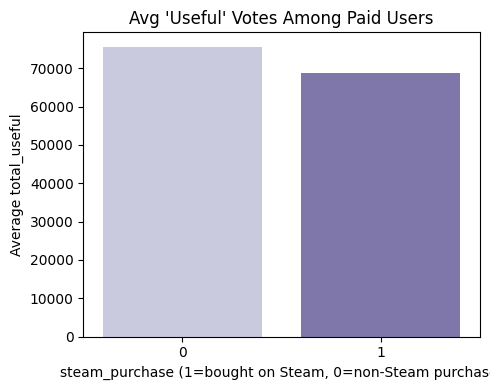

In [ ]:


def get_average_useful_among_paid():
    query = f"""
        SELECT
            steam_purchase,
            AVG(total_useful) AS avg_useful,
            COUNT(*) AS count_reviews
        FROM '{parq}'
        WHERE received_for_free = 0
        GROUP BY steam_purchase
        ORDER BY steam_purchase
    """
    return con.execute(query).fetchdf()

def plot_average_useful_among_paid(df):
    plt.figure(figsize=(5,4))
    sns.barplot(data=df, x='steam_purchase', y='avg_useful', palette='Purples')
    plt.title("Avg 'Useful' Votes Among Paid Users")
    plt.xlabel("steam_purchase (1=bought on Steam, 0=non-Steam purchase)")
    plt.ylabel("Average total_useful")
    plt.tight_layout()
    plt.show()


df_paid_purchase = get_average_useful_among_paid()
print(df_paid_purchase)
plot_average_useful_among_paid(df_paid_purchase)


In [ ]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def get_diff_purchased_vs_free():
    query = f"""
        WITH purchased AS (
            SELECT
                game,
                AVG(total_useful) AS avg_purchased
            FROM '{parq}'
            WHERE steam_purchase=1
              AND received_for_free=0
            GROUP BY game
        ),
        free AS (
            SELECT
                game,
                AVG(total_useful) AS avg_free
            FROM '{parq}'
            WHERE received_for_free=1
            GROUP BY game
        )
        SELECT 
            p.game,
            p.avg_purchased,
            f.avg_free,
            (p.avg_purchased - f.avg_free) AS diff
        FROM purchased p
        JOIN free f ON p.game = f.game
        WHERE p.avg_purchased IS NOT NULL
          AND f.avg_free IS NOT NULL
    """
    con = duckdb.connect()
    return con.execute(query).fetchdf()


df_diff = get_diff_purchased_vs_free()

In [25]:
df_diff

,game,avg_purchased,avg_free,diff
0,Particle Wars,2.076923,3.500000,-1.423077
1,URO2,4.000000,9.500000,-5.500000
2,Stigmatized Property | 事故物件,3.596472,5.478261,-1.881789
3,Iron Blood VR,5.600000,5.000000,0.600000
4,Vortex Attack EX,1.625000,16.666667,-15.041667
...,...,...,...,...
48710,Citadale - The Ancestral Strain,5.625000,0.000000,5.625000
48711,Yellow & Yangtze,2.837209,3.750000,-0.912791
48712,Slime Research,19.500000,0.666667,18.833333
48713,Beat Blocks VR,2.285714,3.500000,-1.214286


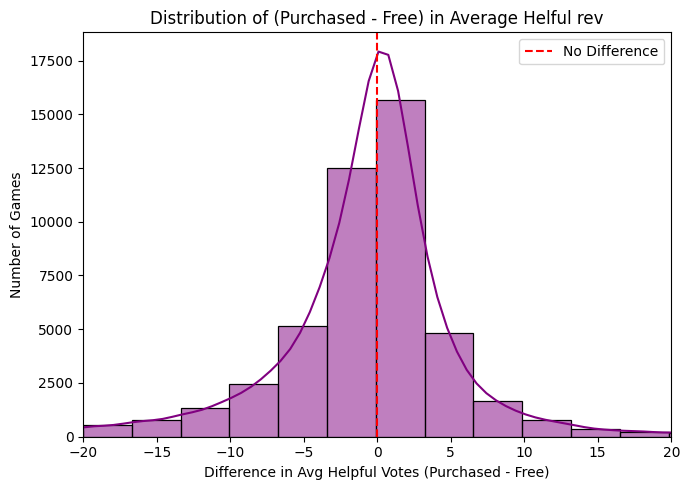

In [29]:


def plot_diff_distribution_scaled(df, lower_q=0.01, upper_q=0.99, x_range=(-20,20)):

    lower_q=0.01
    upper_q=0.99
    x_range=(-20,20)


    low_bound = df['diff'].quantile(lower_q)
    high_bound = df['diff'].quantile(upper_q)
    df_filtered = df[(df['diff'] >= low_bound) & (df['diff'] <= high_bound)].copy()
    
    plt.figure(figsize=(7,5))
    sns.histplot(df_filtered['diff'], bins=40, kde=True, color='purple')
    
    plt.axvline(x=0, color='red', linestyle='--', label='No Difference')
    
    plt.title("Distribution of (Purchased - Free) in Average Helful rev")
    plt.xlabel("Difference in Avg Helpful Votes (Purchased - Free)")
    plt.ylabel("Number of Games")
    plt.xlim(x_range) 
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_diff_distribution_scaled(df_diff)
